# Dambholi (thunderbolt) - An automated cancer detection system v1.0

Goal

Create an automated cancer detection system that can take diverse demographic, patient vitals, physiological and/or pathological data and predict malignancy

Capabilities in v1.0

Take in a dataset involving cancer detection - either demographic or patient vitals or pathological findings

Give an initial Data exploratory summary

Give an initial feature importance summary

Perform an initial run of diverse models including deep neural models

Run a cancer-specific evaluation rubric for the models considered

Further steps related to model fine tuning are manual in v1.0 and will tried to be automated in future versions

Context: 

Cancer is the 2nd leading cause of death in US and will become overtake heart disease in the next 3-5 years to become the Top cause of death. Cancer impacts individuals and disrupts families like no other disease. Prevention and Early detection are key to managing this cancer epidemic.

Motivation: etymology of my tools's name

Dambholi is a mythological thunderbolt used to destroy 'the mountain of disease'



Datasets

https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data

https://www.kaggle.com/datasets/sajidsaifi/prostate-cancer/data

Next Steps:

Get a first draft completed



first draft

1) EDA - 

null values, outliers, correlation among features, how well separated is the data - data visualization - PCA, 

2) Feature 

Section A: EDA
Sectopm B: Baseline Score: average accuracy of running out of box Ski models on raw data (only convert cat variable)
Section C: Data pre-processing
Section D: Feature Selection: external filters (statistical), internal filters (

In [40]:
# Libs

# data structures
import pandas as pd
import numpy as np

# zSrv
# my custom functions
from ipynb.fs.full.Anchana_version2_functions import numvis_pipe, preproc, evalR, evalC, run_pca
# my folder path
from pathlib import Path
myfolder = Path("C:/Users/pdpc/Documents/MLfiles/Data/")

# graphs
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

# train/test split
from sklearn.model_selection import train_test_split

# supress warning
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# time function for timing program run
import time

# patch for overcoming 'float' error in nump 24.1v
np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'

# Classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
# Evaluation

from sklearn.metrics import roc_auc_score

In [29]:
# 2 Get Data

rawdata = pd.read_excel(myfolder / "cancer prostrate cancer.xlsx", sheet_name="cancer prostrate cancer")

rawdata.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## Section A: Exploratory Data Analysis

In [ ]:
# A0 - Data introduction

In [30]:
# A1 - Quick Look at data

# is an out of box pandas function that displays 
rawdata.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [34]:
# A2 - Giving the dataset a name, Identifying X & y

datasetname = 'prostratecancer_dataset'

y_column = ["diagnosis_result"]

# X/y split
X  = rawdata.drop(y_column, axis=1, errors='ignore')
y  = rawdata[y_column].copy()

In [32]:
# A3 - Initial Analysis of Data

print("Dataset shape:  ",rawdata.shape)
print("Dataset size:   ",rawdata.size)
print("Duplicate rows: ",rawdata.duplicated().sum())
print("# of columns with numerical features  :   ",len(rawdata.select_dtypes(include=['int64', 'float64']).columns.values))
print("# of columns with categorical features:   ",len(rawdata.select_dtypes(include=['object', 'category']).columns.values))

Dataset shape:   (100, 10)
Dataset size:    1000
Duplicate rows:  0
# of columns with numerical features  :    9
# of columns with categorical features:    1


In [33]:
# A4 - level 1 data cleaning

# obviously irrelevant columns
# duplicate rows
# Rename Columns

# This helps us do a cleaner data analysis

# in this step I remove very obvious aspects of the dataset like columns with no contribution (id#s or row#s) and rows that are duplicates

drop_col = ['id']
data = rawdata.drop(drop_col, axis=1, errors='ignore')



In [ ]:
# A5 - evaluating numerical features

num_all_features = list(data.select_dtypes(include=['int64', 'float64']).columns.values)

num_all_features

In [ ]:
# A7 - evaluating numerical features impact on y

In [ ]:
# A8 - evaluating categorical features

In [ ]:
# A9 - evaluating categorical features impact on y

In [ ]:
# A10 - Descriptive Statistics

In [ ]:
# A11 - Distribution Analysis

In [ ]:
SGDClassifier

,LOG,KNN,GBC,SVC,DEC,RAF,ABC,ETC,MLP,LDA
Acc_Train,0.8500,0.8500,1.0000,0.8250,1.0000,1.0000,1.0000,1.0000,0.7625,0.8000
Acc_Test,0.9000,0.8500,0.9000,0.8000,0.7500,0.9000,0.7500,0.9000,0.7500,0.9000


# Section B: Feature Engineering

reminder: I already performed level1 data cleaning by removing obviouslly irrelevant columns & duplicate rows 

1) in Handling null values
2) handling outliers
3) Feature Selection: extrinsic filters (pure statistical methods)
4) Feature Selection: intrinsic filters (filters wrapper around a model)
5) Feature Selection: domain expertise / mathematical angle
6) Decision on Feature Selection
7) Feature Scaling

Outcomes:

X_allfeatures
X_selectedfeatures
X_allfeatures_scaled
X_selectedfeatures_scaled

# Section C: Evaluation Rubric specific for Cancer

Cancer models Evaluation Rubric developed by me

there are 10s of evaluation metrics for classification models

Specific to cancer, it is most important that 'false positives' are avoided since it will be disastrous

Hence RECALL is the most important metric, I choose this

Next, F1 score is an aggregated performance score which is the harmonic mean of precision & recall.
F1 is high only when both recall & precision are high. It takes both precision and recall into account.
So I chose this.

Next 


roc_auc_score is an important metric - If ROC AUC is 1, it is a perfect classifier

Accuracy '"This metric a very naive metric that shouldn't be used for most problems"'

we will however include it for completion sake.

To summarize, 

1) Recall 2) F1 score 3) AOC score 4) Accuracy are 4 metrics we will use for Cancer detection in this order of importance

all metrics are correlated - but key point is each metric points out to specific aspect of the validation

while we want false positives to be minimal/none, 
the model should still perform really well by the golden standard evaluation metrics for classification namely
ROC score, accuracy, classification rate

D1 - most important metric: as less False Positives as possible
D2 - other important metrics
D3 - metrics baseline score - average accuracy of running out of box Ski models on raw data (only convert cat variable)

Function module for Evaluation

def


In [ ]:
def Cancer_Evaluation_Rubric:
    # Recall - train, test - put if DF
    # F1 - train, test - put in DF
    # ROC score - train, test - put in DF
    # Accuracy - train, test - put in DF

# Section D: Baseline score thru oob model run

In [45]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
models = [LogisticRegression(),
              KNeighborsClassifier(),
              GradientBoostingClassifier(),
              SVC(),
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier(DecisionTreeClassifier()),
              ExtraTreesClassifier(),
              MLPClassifier(),
              LinearDiscriminantAnalysis()]
                   
names  = ['LOG','KNN','GBC','SVC','DEC','RAF','ABC','ETC','MLP','LDA']

Acc_Train = []
Acc_Test  = []

ROC_AUC_Train = []
ROC_AUC_Test  = []

In [56]:
y_pred

,0
0,B
1,B
2,M
3,M
4,B
5,M
6,M
7,M
8,M
9,M


In [57]:
# ROC_AUC_Train

y_pred = pd.DataFrame(model.predict(X_test))

#roc_auc_score(y_test,y_pred)

In [44]:

for model,name in zip(models,names):
    model.fit(X_train, y_train)
    Acc_Train.append("%.4f" % model.score(X_train, y_train))
    Acc_Test.append("%.4f" % model.score(X_test, y_test))
           
# Getting results of Evaluation into a DF
C1 = pd.DataFrame({'Acc_Train':Acc_Train,'Acc_Test':Acc_Test})
C2 = C1.T
C2.columns = names

C2

,LOG,KNN,GBC,SVC,DEC,RAF,ABC,ETC,MLP,LDA
Acc_Train,0.8375,0.8500,1.0000,0.8000,1.0000,1.0000,1.0000,1.0000,0.8500,0.8750
Acc_Test,0.9500,0.9000,0.8000,0.9000,0.7500,0.9000,0.8000,0.8500,0.8000,0.9000


# Section E: model training & finetuning

In [ ]:
# D1 LogReg

In [ ]:
# D2 KNN

In [ ]:
# D3 

In [38]:
#g = sns.PairGrid(rawdata, hue="diagnosis_result")
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

In [ ]:
# Preprocess
X_preproc = preproc(X)

In [9]:
# Explore Data

numvis_pipe(X)

Dataset shape:   (100, 8)
Dataset size:    800
Duplicate rows:  0
Num features:    8
Cat features:    0
Null features:   0
# of features with normal distribution: 2


<AxesSubplot:>

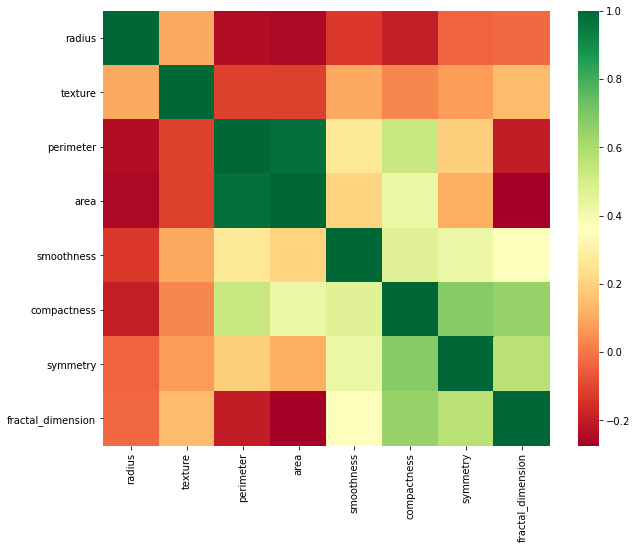

In [10]:
# Visualize Data
# building the correlation matrix

# figure size in inches
rcParams['figure.figsize'] = 10,8
sns.heatmap(data.corr(), annot=False,cmap ='RdYlGn')

In [11]:
# Initial evaluation

tic = time.time()

result = evalC(X_preproc,y)

toc = time.time()

print('time taken for evaluation:', round(toc-tic) , 'seconds' , "\n")
print("Quick analysis of your dataset " + datasetname)

result

time taken for evaluation: 1 seconds 

Quick analysis of your dataset prostratecancer


,LOG,KNN,GBC,SVC,DEC,RAF,ABC,ETC,MLP,LDA
Acc_Train,0.9000,0.8875,1.0000,0.9375,1.0000,1.0000,1.0000,1.0000,0.8875,0.9125
Acc_Test,0.7500,0.8000,0.7500,0.7000,0.7000,0.7000,0.7000,0.7500,0.7500,0.7500


Preserved variance is:  56.96 %
PCA features:           [0.3030254  0.26655728]


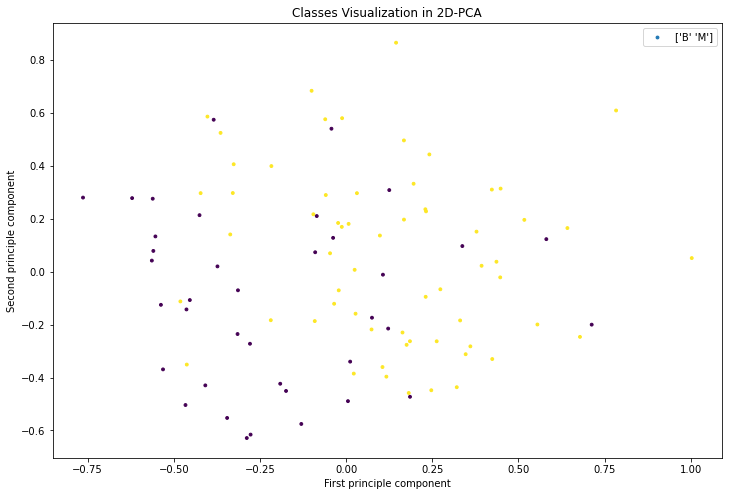

In [12]:
# PCA for visualization

run_pca(X_preproc,y)

In [ ]:
EDA

In [ ]:
Feature Importance

In [ ]:
Baseline run of diverse models

Models

1 Log Reg

2 KNN

3 SVC

4 Decision Tree / Random Forest

5 ANN

6 RNN

Arriving at Baseline score